#### PREPARE
modules import, clean data import

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math as math

In [3]:
df = pd.read_csv('../boston_clean.csv')

##### CHANGING TYPE OF COLUMNS THAT USING TIME AS VALUES

In [5]:
time_columns = ['Pace', '5K', '10K', '15K', '20K', '25K', '30K', '35K', '40K', 'Official Time']
df[time_columns] = df[time_columns].apply(lambda col: pd.to_timedelta(col, errors='coerce'))

# BIVARIATE

## Continent x Official time

In [8]:
df_continent_officialtime = df.copy()[['Continent', 'Official Time']]

df_continent_officialtime_avg = df_continent_officialtime.groupby(by='Continent')['Official Time'].agg(
    min_officialtime='min',
    max_officialtime='max',
    mean_officialtime='mean',
    median_officialtime='median')

for column in df_continent_officialtime_avg:
    df_continent_officialtime_avg[column] = df_continent_officialtime_avg[column].dt.total_seconds() / 3600
df_continent_officialtime_avg

,min_officialtime,max_officialtime,mean_officialtime,median_officialtime
Continent,,,,
Africa,2.154722,5.869167,3.446761,3.081944
Asia,2.174444,6.630000,4.068742,3.941806
Europe,2.231111,6.116944,3.837260,3.737222
North America,2.166111,10.506389,3.890103,3.778333
Oceania,2.471667,6.617778,3.795719,3.693472
South America,2.415000,6.280556,3.598137,3.525833


### visualization

In [10]:
df_continent_officialtime['Official Time'] = df_continent_officialtime['Official Time'].dt.total_seconds() / 3600

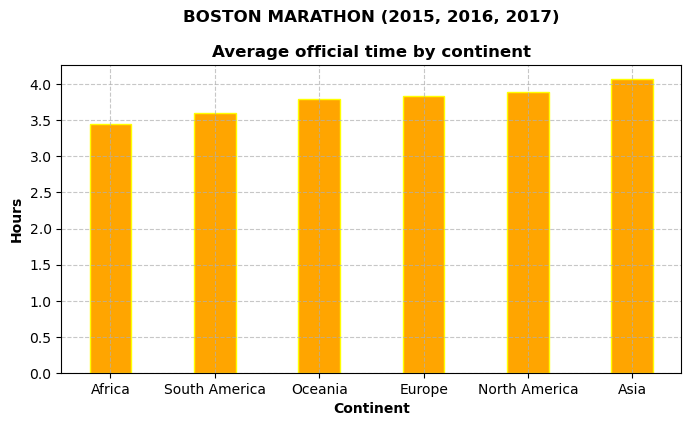

In [11]:
# threshold = 7
# df_gender_time = df_gender_time[df_gender_time['Official Time'] < threshold]
df_continent_officialtime_avg = df_continent_officialtime_avg.sort_values(by='mean_officialtime')

plt.figure(figsize=(8,4))

height = df_continent_officialtime_avg['mean_officialtime']
x = df_continent_officialtime_avg.index

plt.bar(x, height, width=0.4, color='orange', edgecolor='yellow')

plt.grid(True, linestyle='--', alpha=0.7)

plt.xlabel('Continent', fontweight='bold')
plt.ylabel('Hours', fontweight='bold')
plt.title('BOSTON MARATHON (2015, 2016, 2017)\n\nAverage official time by continent', fontweight='bold')

plt.savefig("../vexport/continentxofficialtime.png", dpi=300, bbox_inches='tight')
plt.show()

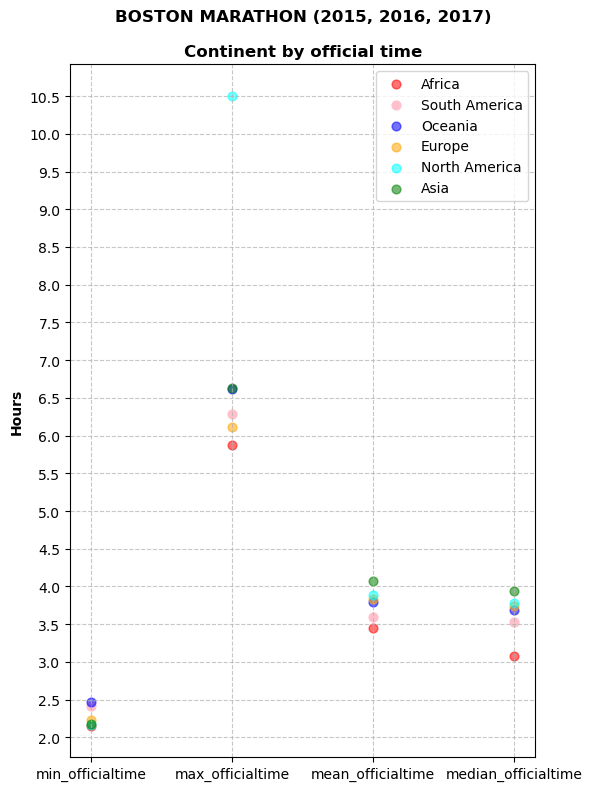

In [12]:
plt.figure(figsize=(6,9))
colors = ['red', 'pink', 'blue', 'orange', 'cyan', 'green']

x = df_continent_officialtime_avg.columns
y = df_continent_officialtime_avg.loc

idx = 0
for continent in df_continent_officialtime_avg.index:
    plt.scatter(x, y[continent], label=continent, color=colors[idx], alpha=1 if colors[idx] == 'pink' else 0.55, s=40)
    idx += 1

plt.legend()
# plt.xticks(np.arange(20,86,5))
plt.yticks(np.arange(2,11,0.5))
plt.grid(True, linestyle='--', alpha=0.7)

plt.xlabel('', fontweight='bold')
plt.ylabel('Hours', fontweight='bold')
plt.title('BOSTON MARATHON (2015, 2016, 2017)\n\nContinent by official time', fontweight='bold')

plt.savefig("../vexport/continentxofficialtime_avg.png", dpi=300, bbox_inches='tight')
plt.show()

#### export

In [14]:
df_continent_officialtime_avg.to_csv('../export/continentxofficialtime_avg.csv')